## The following modules will be used in this project.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
import tensorflow.compat.v1 as tf
from plotnine import *
tf.disable_v2_behavior()

## option data

In [4]:
optionPrice_path = 'D:\Desktop\RND\SP500OptionPrice1996_2020_2.csv'

In [5]:
option_all_df = pd.read_csv(optionPrice_path)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.


In [9]:
print(option_all_df.shape)

(21738936, 38)


In [10]:
print(option_all_df.columns)

Index(['secid', 'date', 'symbol', 'symbol_flag', 'exdate', 'last_date',
       'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'volume',
       'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
       'optionid', 'cfadj', 'am_settlement', 'contract_size', 'ss_flag',
       'forward_price', 'expiry_indicator', 'root', 'suffix', 'cusip',
       'ticker', 'sic', 'index_flag', 'exchange_d', 'class', 'issue_type',
       'industry_group', 'issuer', 'div_convention', 'exercise_style',
       'am_set_flag'],
      dtype='object')


In [12]:
print(option_all_df.describe())

            secid          date   symbol_flag        exdate     last_date  \
count  21738936.0  2.173894e+07  2.173894e+07  2.173894e+07  1.454435e+07   
mean     108105.0  2.016860e+07  9.686811e-01  2.017157e+07  2.016864e+07   
std           0.0  2.962272e+04  1.741782e-01  2.948819e+04  3.046716e+04   
min      108105.0  2.008061e+07  0.000000e+00  2.008061e+07  2.007123e+07   
25%      108105.0  2.015073e+07  1.000000e+00  2.015113e+07  2.015082e+07   
50%      108105.0  2.018020e+07  1.000000e+00  2.018052e+07  2.018022e+07   
75%      108105.0  2.019091e+07  1.000000e+00  2.019122e+07  2.019100e+07   
max      108105.0  2.020123e+07  1.000000e+00  2.023122e+07  2.020123e+07   

       strike_price      best_bid    best_offer        volume  open_interest  \
count  2.173894e+07  2.173894e+07  2.173894e+07  2.173894e+07   2.173894e+07   
mean   2.171978e+06  2.394872e+02  2.432285e+02  1.415781e+02   1.982802e+03   
std    8.003757e+05  3.784102e+02  3.814966e+02  1.092901e+03   8.

In [16]:
option_df = pd.read_csv(optionPrice_path
                        ,usecols=['date','exdate','cp_flag', 'strike_price'
                                  , 'best_bid', 'best_offer', 'impl_volatility', 'vega'])

In [17]:
print(option_df.shape)
print(option_df.describe())

(21738936, 8)
               date        exdate  strike_price      best_bid    best_offer  \
count  2.173894e+07  2.173894e+07  2.173894e+07  2.173894e+07  2.173894e+07   
mean   2.016860e+07  2.017157e+07  2.171978e+06  2.394872e+02  2.432285e+02   
std    2.962272e+04  2.948819e+04  8.003757e+05  3.784102e+02  3.814966e+02   
min    2.008061e+07  2.008061e+07  5.000000e+04  0.000000e+00  5.000000e-02   
25%    2.015073e+07  2.015113e+07  1.600000e+06  3.300000e+00  3.900000e+00   
50%    2.018020e+07  2.018052e+07  2.195000e+06  6.930000e+01  7.180000e+01   
75%    2.019091e+07  2.019122e+07  2.740000e+06  3.186000e+02  3.255000e+02   
max    2.020123e+07  2.023122e+07  6.500000e+06  3.652100e+03  3.659600e+03   

       impl_volatility          vega  
count     1.918776e+07  1.918776e+07  
mean      3.066118e-01  2.088949e+02  
std       2.591594e-01  2.629679e+02  
min       1.621000e-02  1.760000e-04  
25%       1.633820e-01  2.528836e+01  
50%       2.399800e-01  1.105779e+02  
7

In [18]:
print(option_df.head(20))

        date    exdate cp_flag  strike_price  best_bid  best_offer  \
0   20080609  20080613       C       1250000    110.00      116.00   
1   20080609  20080613       C       1300000     60.90       66.90   
2   20080609  20080613       C       1350000     19.20       22.50   
3   20080609  20080613       C       1400000      1.30        1.60   
4   20080609  20080613       C       1450000      0.00        0.20   
5   20080609  20080613       C       1275000     85.20       91.20   
6   20080609  20080613       C       1325000     39.00       43.00   
7   20080609  20080613       P       1250000      0.25        0.40   
8   20080609  20080613       P       1300000      1.20        1.85   
9   20080609  20080613       P       1350000      7.50        9.50   
10  20080609  20080613       P       1400000     35.60       40.20   
11  20080609  20080613       P       1450000     84.20       90.20   
12  20080609  20080613       P       1275000      0.15        1.15   
13  20080609  200806

In [43]:
df = option_df.head(20)
print(df.shape)
df2 = df.dropna()
print(df2.shape[0])
print(df2)

(20, 12)
18
        date    exdate cp_flag  strike_price  best_bid  best_offer  \
0   20080609  20080613       C         1.250    110.00      116.00   
1   20080609  20080613       C         1.300     60.90       66.90   
2   20080609  20080613       C         1.350     19.20       22.50   
3   20080609  20080613       C         1.400      1.30        1.60   
4   20080609  20080613       C         1.450      0.00        0.20   
5   20080609  20080613       C         1.275     85.20       91.20   
6   20080609  20080613       C         1.325     39.00       43.00   
7   20080609  20080613       P         1.250      0.25        0.40   
8   20080609  20080613       P         1.300      1.20        1.85   
9   20080609  20080613       P         1.350      7.50        9.50   
12  20080609  20080613       P         1.275      0.15        1.15   
13  20080609  20080613       P         1.325      2.55        4.20   
14  20080609  20090331       C         1.050    339.60      341.60   
15  2008

In [21]:
def FindNearestDays(d):
    list_days = np.array([10,30,60,91,122,152,182,273,365,547,730])
    list_diff = np.abs(list_days-d)
    day = list_days[np.argmin(list_diff)]
    return day

In [41]:
option_df['strike_price'] = option_df['strike_price']/1000
option_df['price'] = (option_df['best_bid'] + option_df['best_offer'])/2
#option_df['days'] = (option_df['exdate']-option_df['date'])
option_df['days'] = (option_df['exdate'].apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d'))-option_df['date'].apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d'))).apply(lambda x:int(x.days))
option_df['tau'] = option_df['days']/360
option_df['volday'] = option_df['days'].apply(lambda x:FindNearestDays(x))

In [45]:
print(option_df.head(20))

        date    exdate cp_flag  strike_price  best_bid  best_offer  \
0   20080609  20080613       C         1.250    110.00      116.00   
1   20080609  20080613       C         1.300     60.90       66.90   
2   20080609  20080613       C         1.350     19.20       22.50   
3   20080609  20080613       C         1.400      1.30        1.60   
4   20080609  20080613       C         1.450      0.00        0.20   
5   20080609  20080613       C         1.275     85.20       91.20   
6   20080609  20080613       C         1.325     39.00       43.00   
7   20080609  20080613       P         1.250      0.25        0.40   
8   20080609  20080613       P         1.300      1.20        1.85   
9   20080609  20080613       P         1.350      7.50        9.50   
10  20080609  20080613       P         1.400     35.60       40.20   
11  20080609  20080613       P         1.450     84.20       90.20   
12  20080609  20080613       P         1.275      0.15        1.15   
13  20080609  200806

In [ ]:
df = option_df.head(20)
print(df.shape)
df2 = df.dropna()
print(df2.shape[0])
print(df2)

In [47]:
option_cl_df = option_df.dropna()

In [54]:
(option_df.shape[0] - option_cl_df.shape[0])/option_df.shape[0]

0.11735523762524531

In [57]:
print(option_df.isna().sum())

date                     0
exdate                   0
cp_flag                  0
strike_price             0
best_bid                 0
best_offer               0
impl_volatility    2551178
vega               2551178
price                    0
days                     0
tau                      0
volday                   0
dtype: int64


In [60]:
option_cl_df['volday'].unique()


array([ 10, 273,  30, 122, 182,  60,  91, 730, 365, 547, 152])

In [62]:
option_cl_df.columns

Index(['date', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer',
       'impl_volatility', 'vega', 'price', 'days', 'tau', 'volday'],
      dtype='object')

In [67]:
option_cl_df['cp_flag'].value_counts()

P    10027993
C     9159765
Name: cp_flag, dtype: int64

In [68]:
option_cl_df['days'].value_counts()

7       269284
14      267914
21      261032
28      252755
15      244435
         ...  
377        274
1090       180
1069       157
838        101
1034        83
Name: days, Length: 992, dtype: int64

In [95]:
option_cl_df['volday'].value_counts()

30     4373314
10     3972071
60     3121069
91     2059545
122    1173291
273     946059
365     864740
182     804887
152     692717
730     660288
547     519777
Name: volday, dtype: int64

In [72]:
option_cl_df['date'].value_counts()

20200317    19951
20200324    19623
20200312    19446
20200318    19331
20200319    19292
            ...  
20080620     1017
20080717     1015
20080918     1004
20080619      941
20080929      920
Name: date, Length: 3165, dtype: int64

In [76]:
option_cl_df.groupby(['date','exdate']).mean()

strike_price    best_bid  best_offer  impl_volatility  \
date     exdate                                                            
20080609 20080613      1.320833   27.270833   29.875000         0.315075   
         20080621      1.295464   64.671585   65.590984         0.392334   
         20080630      1.315000   54.227143   55.420000         0.267345   
         20080719      1.305954   75.256069   76.424566         0.262118   
         20080816      1.377717   88.403804   89.697283         0.222357   
...                         ...         ...         ...              ...   
20201231 20220121      3.306103  489.950469  497.754225         0.272271   
         20220318      3.297489  513.555479  522.361872         0.268376   
         20220617      3.180579  568.380165  580.702273         0.273054   
         20221216      2.926389  672.285590  687.749306         0.286270   
         20231215      3.291441  613.444144  669.359009         0.241380   

                          vega       price    days       tau  volday  
date     exdate                                                       
20080609 20080613    24.826259   28.572917     4.0  0.011111    10.0  
         20080621    28.056677   65.131284    12.0  0.033333    10.0  
         20080630    53.674364   54.823571    21.0  0.058333    30.0  
         20080719    83.584982   75.840318    40.0  0.111111    30.0  
         20080816   117.821819   89.050543    68.0  0.188889    60.0  
...                        ...         ...     ...       ...     ...  
20201231 20220121   906.987085  493.852347   386.0  1.072222   365.0  
         20220318   984.124852  517.958676   442.0  1.227778   365.0  
         20220617  1064.080410  574.541219   533.0  1.480556   547.0  
         20221216  1159.572843  680.017448   715.0  1.986111   730.0  
         20231215  1729.165855  641.401577  1079.0  2.997222   730.0  

[77656 rows x 9 columns]

In [102]:
st_path = 'D:\Desktop\RND\IndexPrice1996_2020.csv'
st_df = pd.read_csv(st_path,usecols=['date', 'open', 'close'])
st_df['St'] = (st_df['open'] + st_df['open'])/2
st_df['date'] = st_df['date'].apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d'))
print(st_df.shape)
print(st_df.columns)

(6295, 4)
Index(['date', 'open', 'close', 'St'], dtype='object')


In [103]:
print(st_df.isna().sum())

date     0
open     0
close    0
St       0
dtype: int64


In [116]:
print(st_df.head(10))

        date    open   close      St
0 1996-01-02  615.93  620.73  615.93
1 1996-01-03  620.73  621.32  620.73
2 1996-01-04  621.32  617.70  621.32
3 1996-01-05  617.70  616.71  617.70
4 1996-01-08  616.71  618.46  616.71
5 1996-01-09  618.46  609.45  618.46
6 1996-01-10  609.45  598.48  609.45
7 1996-01-11  598.48  602.69  598.48
8 1996-01-12  602.69  601.81  602.69
9 1996-01-15  601.81  599.82  601.81


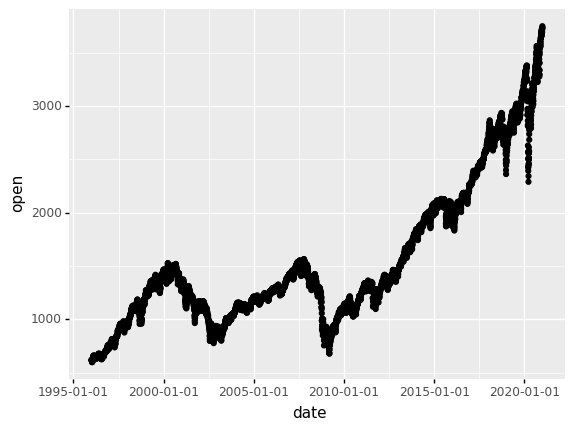

<ggplot: (128292263211)>

In [120]:
p = ggplot(st_df,aes(x='date',y='open'))+ geom_point()
p

No handles with labels found to put in legend.


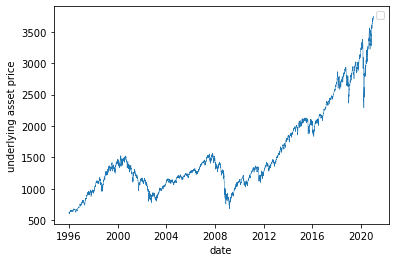

In [143]:
plt.figure()
#plt.plot(st_df['date'],st_df['open'],linewidth=0.5)
#plt.plot(st_df['date'],st_df['close'])
plt.plot(st_df['date'],st_df['St'],linewidth=0.5)
plt.legend()
plt.xlabel("date")
plt.ylabel("underlying asset price")
plt.savefig('D:\\g.jpg')
#plt.title('IVs for date: %d cp_flag: %d'%(st_df['date'].min(), st_df['date'].max()))

In [132]:
st_df['date'][0]

Timestamp('1996-01-02 00:00:00')

No handles with labels found to put in legend.


Text(0, 0.5, 'underlying asset price')

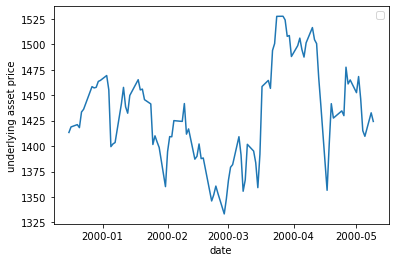

In [137]:
plt.figure()
#plt.plot(st_df['date'][1000:1100],st_df['open'][1000:1100],linewidth=0.5)
#plt.plot(st_df['date'][1000:1100],st_df['close'][1000:1100])
plt.plot(st_df['date'][1000:1100],st_df['St'][1000:1100])
plt.legend()
plt.xlabel("date")
plt.ylabel("underlying asset price")

In [183]:
path = 'D:\Desktop\RND\VolatilitySurface1996_2020.csv'
vol_df = pd.read_csv(path,usecols=['date', 'days', 'impl_volatility', 'impl_strike', 'cp_flag'])
vol_df['date_ymd'] = vol_df['date'].apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d'))
print(vol_df.shape)
print(vol_df.describe())

(2353582, 6)
               date          days  impl_volatility   impl_strike
count  2.353582e+06  2.353582e+06     2.235534e+06  2.353582e+06
mean   2.008068e+07  2.329091e+02     1.952400e-01  1.499779e+03
std    7.213542e+04  2.189112e+02     7.272779e-02  7.600531e+02
min    1.996010e+07  1.000000e+01     2.922700e-02  0.000000e+00
25%    2.002040e+07  6.000000e+01     1.434250e-01  1.056055e+03
50%    2.008070e+07  1.520000e+02     1.843410e-01  1.332362e+03
75%    2.014100e+07  3.650000e+02     2.307860e-01  1.903006e+03
max    2.020123e+07  7.300000e+02     1.282831e+00  5.503259e+03


In [184]:
print(vol_df['days'].unique())
print(vol_df['date'].unique())
print(len(vol_df['date'].unique()))

[ 10  30  60  91 122 152 182 273 365 547 730]
[19960104 19960105 19960108 ... 20201229 20201230 20201231]
6293


In [185]:
vol_df.head(10)

,date,days,impl_volatility,impl_strike,cp_flag,date_ymd
0,19960104,10,NaN,0.0,P,1996-01-04
1,19960104,10,NaN,0.0,P,1996-01-04
2,19960104,10,NaN,0.0,P,1996-01-04
3,19960104,10,NaN,0.0,P,1996-01-04
4,19960104,10,NaN,0.0,P,1996-01-04
5,19960104,10,NaN,0.0,P,1996-01-04
6,19960104,10,NaN,0.0,P,1996-01-04
7,19960104,10,NaN,0.0,P,1996-01-04
8,19960104,10,NaN,0.0,P,1996-01-04
9,19960104,10,NaN,0.0,P,1996-01-04


In [186]:
print(vol_df.isna().sum())
vol_df.isna().sum()['impl_volatility']/vol_df.shape[0]

date                    0
days                    0
impl_volatility    118048
impl_strike             0
cp_flag                 0
date_ymd                0
dtype: int64


0.050156739811912224

In [187]:
vol_clean_df = vol_df.dropna()
vol_clean_c_df = vol_clean_df[vol_clean_df['cp_flag']=='C']
print(vol_clean_c_df.shape)
vol_clean_p_df = vol_clean_df[vol_clean_df['cp_flag']=='P']
print(vol_clean_p_df.shape)

(1117767, 6)
(1117767, 6)


In [248]:
date = 20200605
dayVolS_c = vol_clean_c_df[vol_clean_c_df['date']==date].sort_values(by=['days']).reset_index(drop=True)
print(dayVolS_c)

         date  days  impl_volatility  impl_strike cp_flag   date_ymd
0    20200605    10         0.188944     3325.012       C 2020-06-05
1    20200605    10         0.213976     3052.868       C 2020-06-05
2    20200605    10         0.210920     3081.109       C 2020-06-05
3    20200605    10         0.206553     3103.980       C 2020-06-05
4    20200605    10         0.201588     3123.433       C 2020-06-05
..        ...   ...              ...          ...     ...        ...
182  20200605   730         0.160887     4046.660       C 2020-06-05
183  20200605   730         0.157386     4249.235       C 2020-06-05
184  20200605   730         0.279699     2152.420       C 2020-06-05
185  20200605   730         0.195417     3335.027       C 2020-06-05
186  20200605   730         0.289190     1888.840       C 2020-06-05

[187 rows x 6 columns]


C:\Users\dell\AppData\Local\Temp/ipykernel_59184/2326352378.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


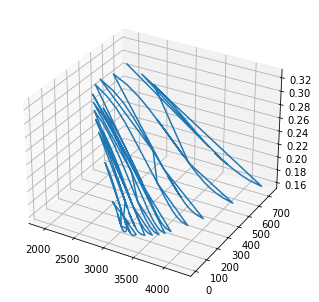

In [205]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(dayVolS_c['impl_strike'],dayVolS_c['days'],dayVolS_c['impl_volatility'])


In [192]:
from mpl_toolkits.mplot3d import Axes3D

In [197]:
xx = np.arange(-5,5,0.5)
yy = np.arange(-5,5,0.5)
X, Y = np.meshgrid(xx, yy)
Z = np.sin(X)+np.cos(Y)

C:\Users\dell\AppData\Local\Temp/ipykernel_59184/3969026072.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


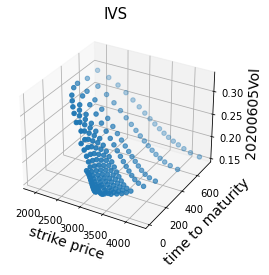

In [214]:
import matplotlib.pyplot as mp
ax3d = mp.gca(projection="3d")

mp.title('IVS', fontsize=15)
ax3d.set_xlabel('strike price', fontsize=14)
ax3d.set_ylabel('time to maturity', fontsize=14)
ax3d.set_zlabel('20200605Vol', fontsize=14)
mp.tick_params(labelsize=10)

ax3d.scatter(dayVolS_c['impl_strike'],dayVolS_c['days'],dayVolS_c['impl_volatility'], s=20, cmap="jet", marker="o")

mp.show()

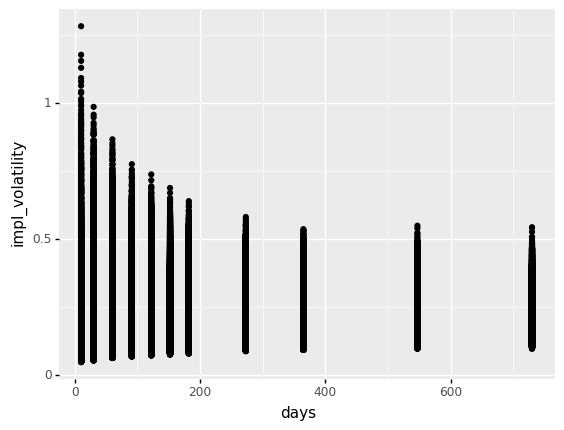

<ggplot: (128779452046)>

In [285]:

(
ggplot(vol_clean_c_df,aes(x='days',y='impl_volatility'))
+ geom_point()
)


In [326]:
p1 = (
    ggplot(vol_clean_c_df,aes(x='days',y='impl_volatility'))
    + geom_point()
    + xlab("time to maturity") 
    + ylab("volatility")
)

p2 = (
    ggplot(vol_clean_c_df,aes(x='factor(days)',y='impl_volatility'))
    + geom_boxplot()
    + xlab("time to maturity") 
    + ylab("volatility")
)

p3 = (
    ggplot(vol_clean_c_df,aes(x='date',y='impl_volatility'))  
    + geom_jitter(aes(color='factor(days)'))
    + xlab("date") 
    + ylab("volatility")
)

p4 = (
    ggplot(vol_clean_c_df,aes(x='factor(date)',y='impl_volatility'))
    + geom_boxplot()
    + xlab("date") 
    + ylab("volatility")
)

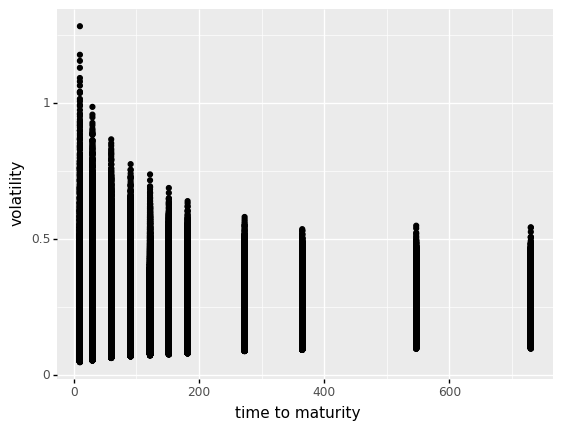

<ggplot: (129014930408)>

In [320]:
p1

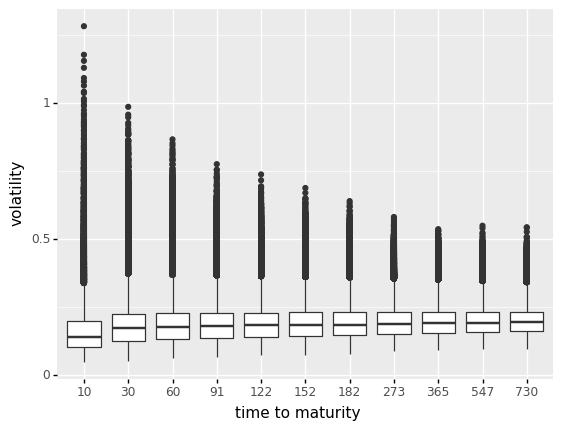

<ggplot: (129014927607)>

In [321]:
p2

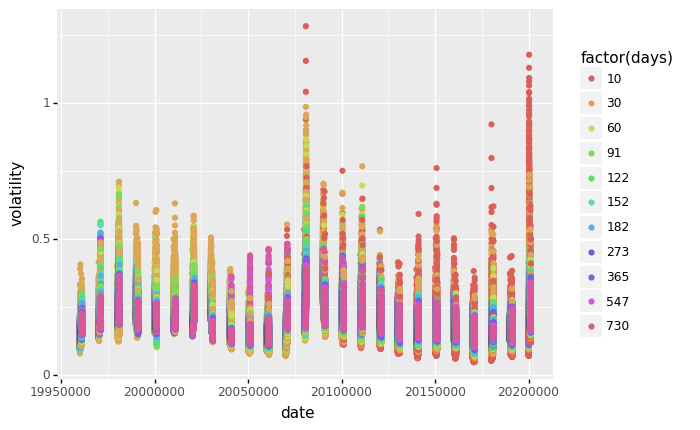

<ggplot: (129014932938)>

In [322]:
p3

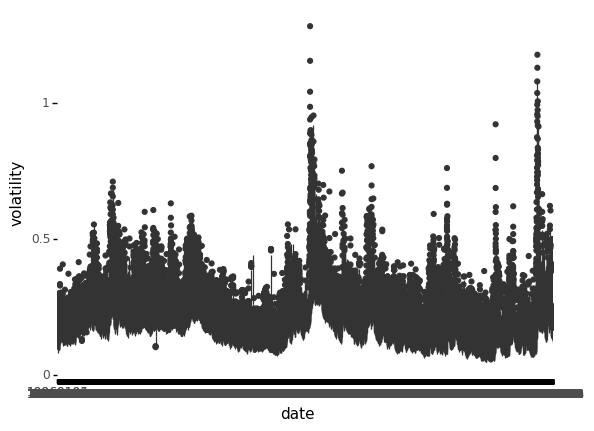

<ggplot: (129173079525)>

In [327]:
p4

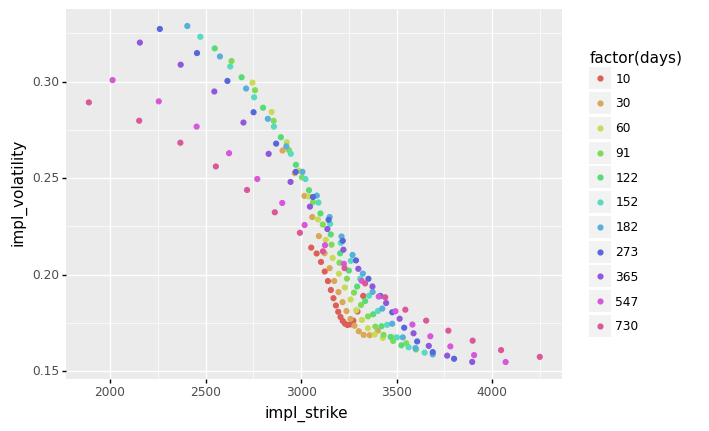

<ggplot: (128745393824)>

In [247]:
(
ggplot(dayVolS_c,aes(x='impl_strike',y='impl_volatility', color='factor(days)'))
    + geom_point()  
)

In [230]:
dayVolS_c

,date,days,impl_volatility,impl_strike,cp_flag,date_ymd
0,20200605,10,0.188944,3325.012,C,2020-06-05
1,20200605,10,0.213976,3052.868,C,2020-06-05
2,20200605,10,0.210920,3081.109,C,2020-06-05
3,20200605,10,0.206553,3103.980,C,2020-06-05
4,20200605,10,0.201588,3123.433,C,2020-06-05
...,...,...,...,...,...,...
182,20200605,730,0.160887,4046.660,C,2020-06-05
183,20200605,730,0.157386,4249.235,C,2020-06-05
184,20200605,730,0.279699,2152.420,C,2020-06-05
185,20200605,730,0.195417,3335.027,C,2020-06-05


In [ ]:
(
    ggplot(dayVolS_c,aes(x='days',y='impl_volatility'))
           + geom_point()
)

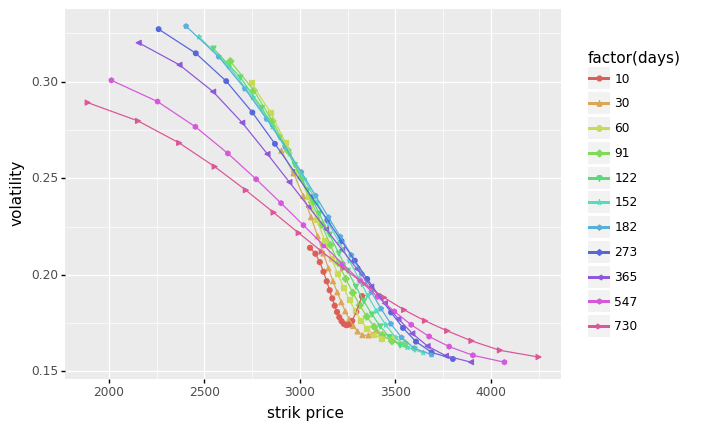

<ggplot: (128779563388)>

In [281]:
p1 = (
    ggplot(dayVolS_c,aes(x='impl_strike',y='impl_volatility', color='factor(days)',group = 'factor(days)',shape='factor(days)'))
    + geom_point() 
    + geom_line() 
    + xlab("strik price") 
    + ylab("volatility") 
)
p1

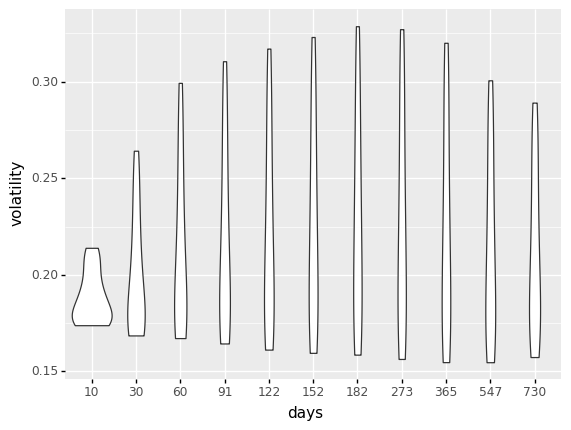

<ggplot: (129188560378)>

In [339]:
(
    ggplot(dayVolS_c,aes(x='factor(days)',y='impl_volatility'))
    + geom_violin() 
    + xlab("days") 
    + ylab("volatility") 
)

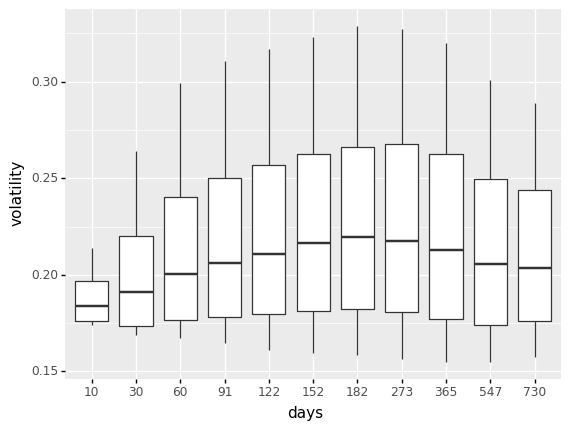

<ggplot: (129173193963)>

In [343]:
(
    ggplot(dayVolS_c,aes(x='factor(days)',y='impl_volatility'))
    + geom_boxplot() 
    + xlab("days") 
    + ylab("volatility") 
)

In [344]:
rate_path = 'D:\Desktop\RND\InterestRate1996_2020.csv'
rate_df = pd.read_csv(rate_path)
print(rate_df.shape)
print(rate_df.head(5))

(283103, 3)
       date  days      rate
0  19960102     9  5.763067
1  19960102    15  5.745902
2  19960102    50  5.673317
3  19960102    78  5.608884
4  19960102   169  5.473762


In [345]:
rate_df.isna().sum()

date    0
days    0
rate    0
dtype: int64

In [349]:
a = rate_df.groupby('date').mean()
type(a)

pandas.core.frame.DataFrame

In [353]:
option_cl_df.head(10)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,vega,price,days,tau,volday
0,20080609,20080613,C,1.250,110.00,116.00,0.482533,12.924990,113.000,4,0.011111,10
1,20080609,20080613,C,1.300,60.90,66.90,0.338792,23.557950,63.900,4,0.011111,10
2,20080609,20080613,C,1.350,19.20,22.50,0.250293,53.562950,20.850,4,0.011111,10
3,20080609,20080613,C,1.400,1.30,1.60,0.207699,25.672580,1.450,4,0.011111,10
4,20080609,20080613,C,1.450,0.00,0.20,0.249773,3.295213,0.100,4,0.011111,10
5,20080609,20080613,C,1.275,85.20,91.20,0.402758,16.232900,88.200,4,0.011111,10
6,20080609,20080613,C,1.325,39.00,43.00,0.293278,37.652440,41.000,4,0.011111,10
7,20080609,20080613,P,1.250,0.25,0.40,0.386461,5.785241,0.325,4,0.011111,10
8,20080609,20080613,P,1.300,1.20,1.85,0.312416,20.257930,1.525,4,0.011111,10
9,20080609,20080613,P,1.350,7.50,9.50,0.240176,53.309230,8.500,4,0.011111,10


In [354]:
option_cl_c_df = option_cl_df[option_cl_df['cp_flag']=='C']


In [355]:
print(option_cl_c_df.shape)

(9159765, 12)


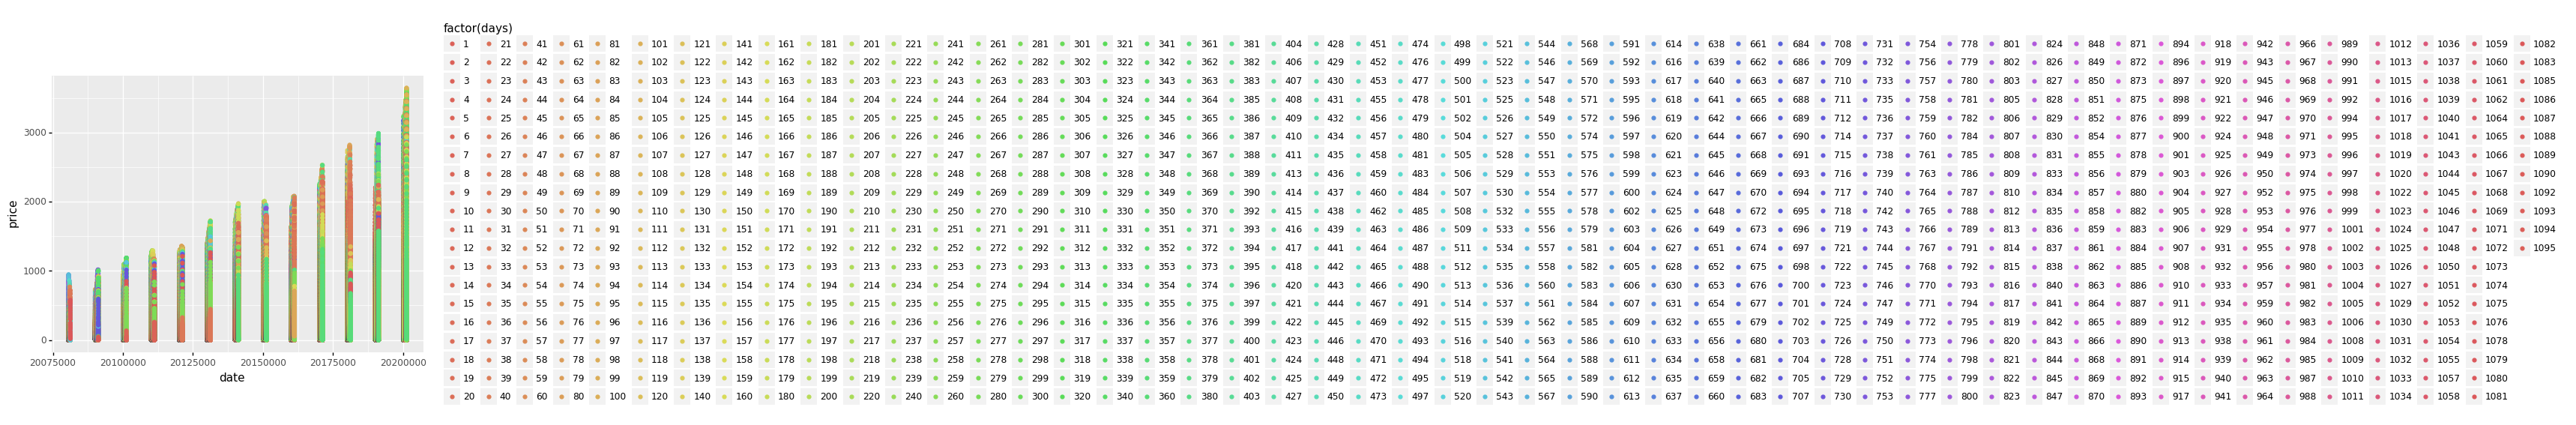

<ggplot: (129015164413)>

In [356]:
(
    ggplot(option_cl_c_df,aes(x='date',y='price'))  
    + geom_jitter(aes(color='factor(days)'))
    + xlab("date") 
    + ylab("price")
)

In [373]:
option_cl_c_df['date_ymd'] = option_cl_c_df['date'].apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d'))


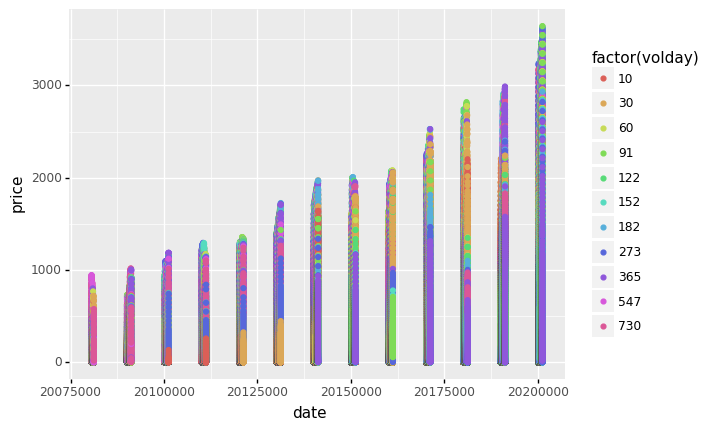

<ggplot: (129318294363)>

In [360]:
(
    ggplot(option_cl_c_df,aes(x='date',y='price'))  
    + geom_jitter(aes(color='factor(volday)'))
    + xlab("date") 
    + ylab("price")
)

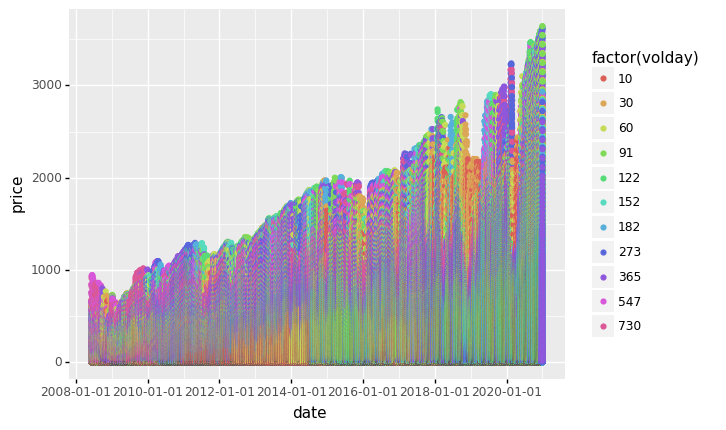

<ggplot: (129319324654)>

In [374]:
(
    ggplot(option_cl_c_df,aes(x='date_ymd',y='price'))  
    + geom_jitter(aes(color='factor(volday)'))
    + xlab("date") 
    + ylab("price")
)

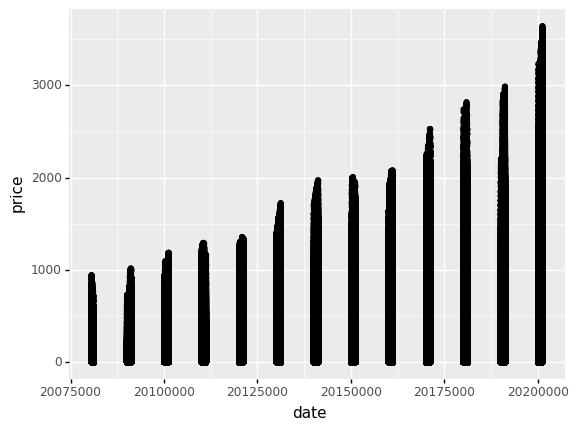

<ggplot: (129321020112)>

In [361]:
(
    ggplot(option_cl_c_df,aes(x='date',y='price'))  
    + geom_jitter()
    + xlab("date") 
    + ylab("price")
)

In [376]:
dateoption = option_cl_c_df['date'].unique()
dateoption

array([20080609, 20080610, 20080611, ..., 20201229, 20201230, 20201231],
      dtype=int64)

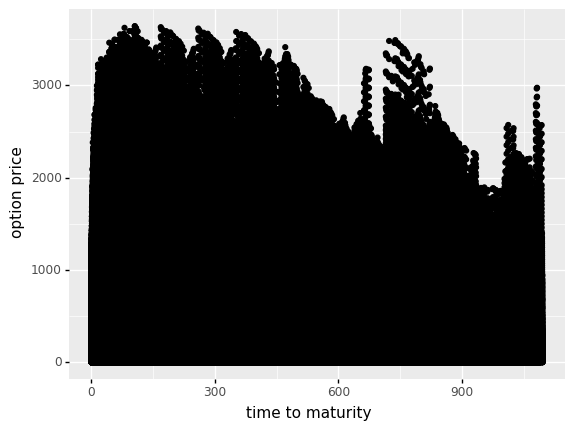

<ggplot: (129015204286)>

In [357]:
(
    ggplot(option_cl_c_df,aes(x='days',y='price'))
    + geom_point()
    + xlab("time to maturity") 
    + ylab("option price")
)

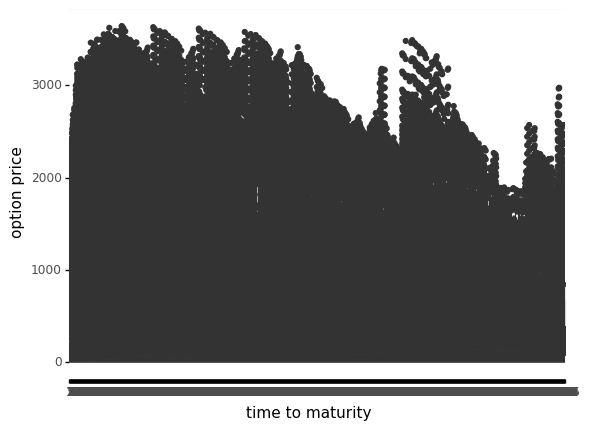

<ggplot: (129701639783)>

In [358]:
(
    ggplot(option_cl_c_df,aes(x='factor(days)',y='price'))
    + geom_boxplot()
    + xlab("time to maturity") 
    + ylab("option price")
)

In [359]:
date = 20200605
dayoption_cl_c_df = option_cl_c_df[option_cl_c_df['date']==date].sort_values(by=['days']).reset_index(drop=True)
print(dayoption_cl_c_df)

          date    exdate cp_flag  strike_price  best_bid  best_offer  \
0     20200605  20200608       C         3.140     51.90       55.30   
1     20200605  20200608       C         3.310      0.40        0.50   
2     20200605  20200608       C         3.320      0.35        0.45   
3     20200605  20200608       C         3.325      0.30        0.40   
4     20200605  20200608       C         3.330      0.30        0.40   
...        ...       ...     ...           ...       ...         ...   
5134  20200605  20221216       C         2.100   1097.70     1128.60   
5135  20200605  20221216       C         2.075   1117.90     1148.80   
5136  20200605  20221216       C         2.050   1138.20     1169.10   
5137  20200605  20221216       C         2.000   1179.20     1210.10   
5138  20200605  20221216       C         2.175   1032.80     1079.20   

      impl_volatility        vega    price  days       tau  volday  
0            0.047787     0.05552    53.60     3  0.008333      10

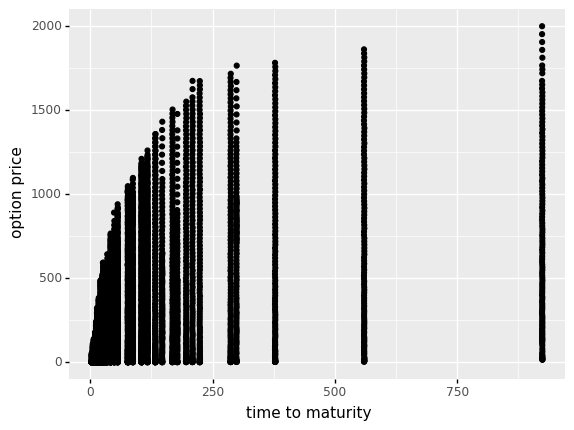

<ggplot: (129318259053)>

In [363]:
(
    ggplot(dayoption_cl_c_df,aes(x='days',y='price'))
    + geom_jitter()
    + xlab("time to maturity") 
    + ylab("option price")
)

C:\Anaconda3\lib\site-packages\mizani\palettes.py:647: UserWarning: Palette can return a maximum of 13 values. 34 values requested.
C:\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3545 rows containing missing values.
C:\Anaconda3\lib\site-packages\mizani\palettes.py:647: UserWarning: Palette can return a maximum of 13 values. 34 values requested.
C:\Anaconda3\lib\site-packages\plotnine\guides\guides.py:261: PlotnineWarning: geom_point legend : Removed 21 rows containing missing values.


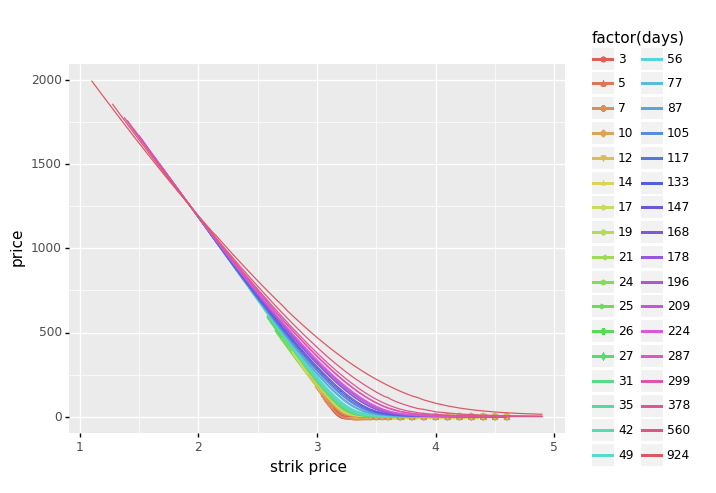

<ggplot: (129318289927)>

In [364]:
    (
        ggplot(dayoption_cl_c_df,aes(x='strike_price',y='price', color='factor(days)',group = 'factor(days)',shape='factor(days)'))
        + geom_point() 
        + geom_line() 
        + xlab("strik price") 
        + ylab("price") 
    )

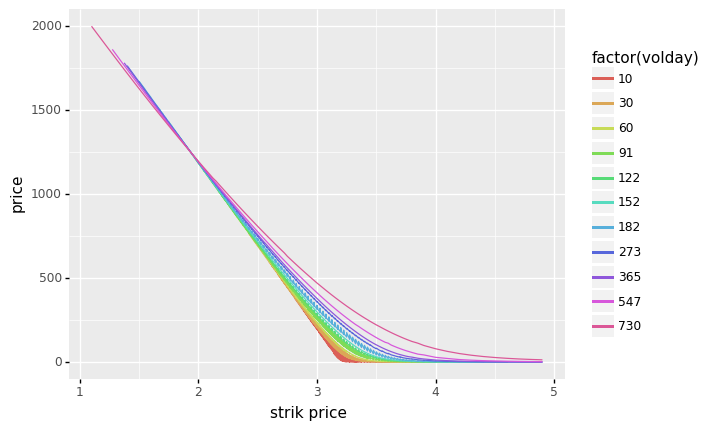

<ggplot: (129319036151)>

In [371]:
    (
        ggplot(dayoption_cl_c_df,aes(x='strike_price',y='price', color='factor(volday)',group = 'factor(volday)'))
        + geom_line() 
        + xlab("strik price") 
        + ylab("price") 
    )

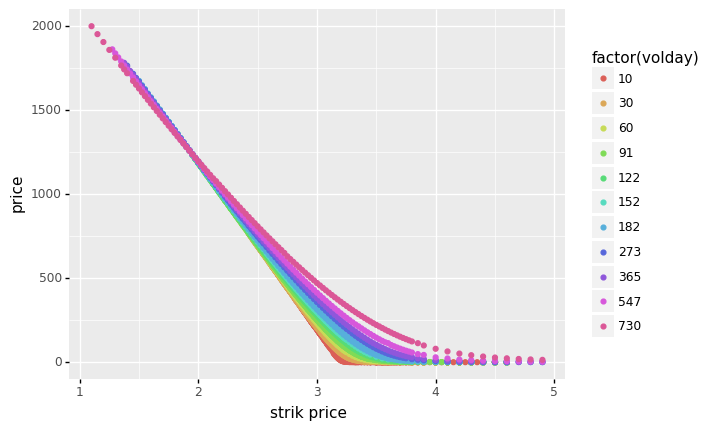

<ggplot: (129319193847)>

In [372]:
    (
        ggplot(dayoption_cl_c_df,aes(x='strike_price',y='price', color='factor(volday)',group = 'factor(volday)'))
        + geom_point() 
        + xlab("strik price") 
        + ylab("price") 
    )

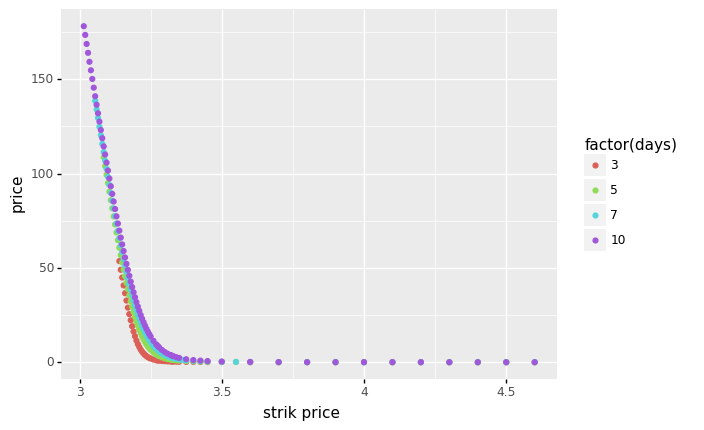

<ggplot: (129319027423)>

In [380]:
tdayoption_cl_c_df = dayoption_cl_c_df[dayoption_cl_c_df['days'] < 11].sort_values(by=['days']).reset_index(drop=True)

(
        ggplot(tdayoption_cl_c_df,aes(x='strike_price',y='price', color='factor(days)',group = 'factor(days)'))
        + geom_point() 
        + xlab("strik price") 
        + ylab("price") 
)

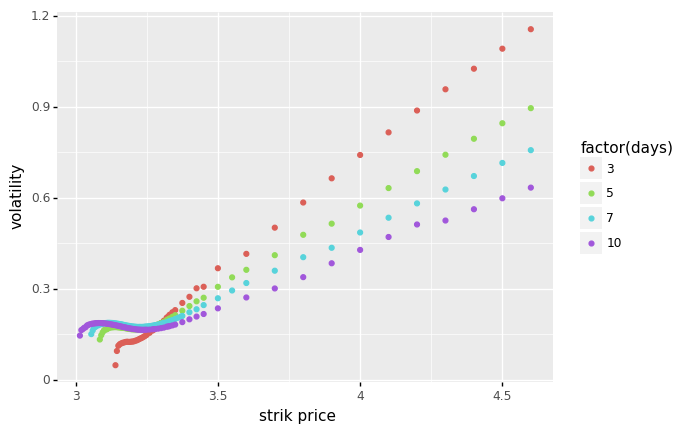

<ggplot: (129376040918)>

In [389]:
tdayoption_cl_c_df = dayoption_cl_c_df[dayoption_cl_c_df['days'] < 11].sort_values(by=['days']).reset_index(drop=True)

(
        ggplot(tdayoption_cl_c_df,aes(x='strike_price',y='impl_volatility', color='factor(days)',group = 'factor(days)'))
        + geom_point() 
        + xlab("strik price") 
        + ylab("volatility") 
)

In [386]:
tdayoption_cl_c_df

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,vega,price,days,tau,volday
0,20200605,20200612,C,3.335,1.9,2.05,0.194431,48.997110,1.975,7,0.019444,10
1,20200605,20200612,C,3.055,136.9,140.20,0.150272,18.026460,138.550,7,0.019444,10
2,20200605,20200612,C,3.250,10.6,10.80,0.175482,136.729300,10.700,7,0.019444,10
3,20200605,20200612,C,3.065,127.8,131.10,0.171826,39.270720,129.450,7,0.019444,10
4,20200605,20200612,C,3.070,123.1,126.50,0.174383,45.907840,124.800,7,0.019444,10
...,...,...,...,...,...,...,...,...,...,...,...,...
73,20200605,20200612,C,4.300,0.0,0.05,0.626944,0.574641,0.025,7,0.019444,10
74,20200605,20200612,C,4.500,0.0,0.05,0.714584,0.513742,0.025,7,0.019444,10
75,20200605,20200612,C,4.600,0.0,0.05,0.756613,0.489220,0.025,7,0.019444,10
76,20200605,20200612,C,3.900,0.0,0.05,0.434852,0.786084,0.025,7,0.019444,10
